In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread
from skimage.exposure import rescale_intensity, equalize_hist

### **Imagen: dark_1.png**

1. **Ajuste de brillo**
2. **Transformación logarítmica**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1..1.1].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..20.79441541679836].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1..2.0].


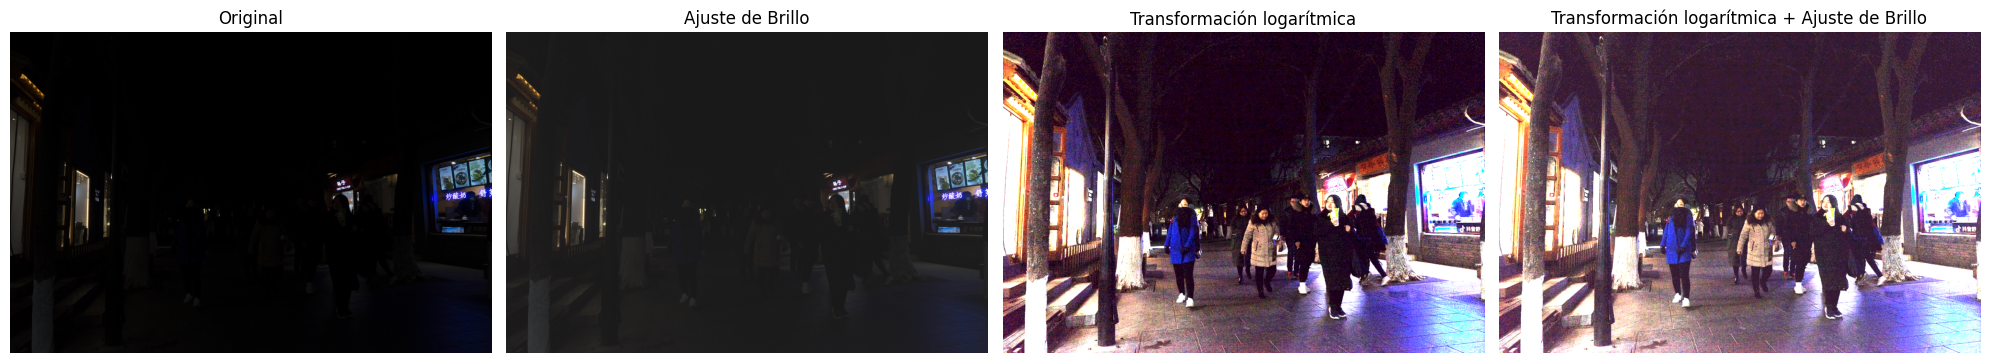

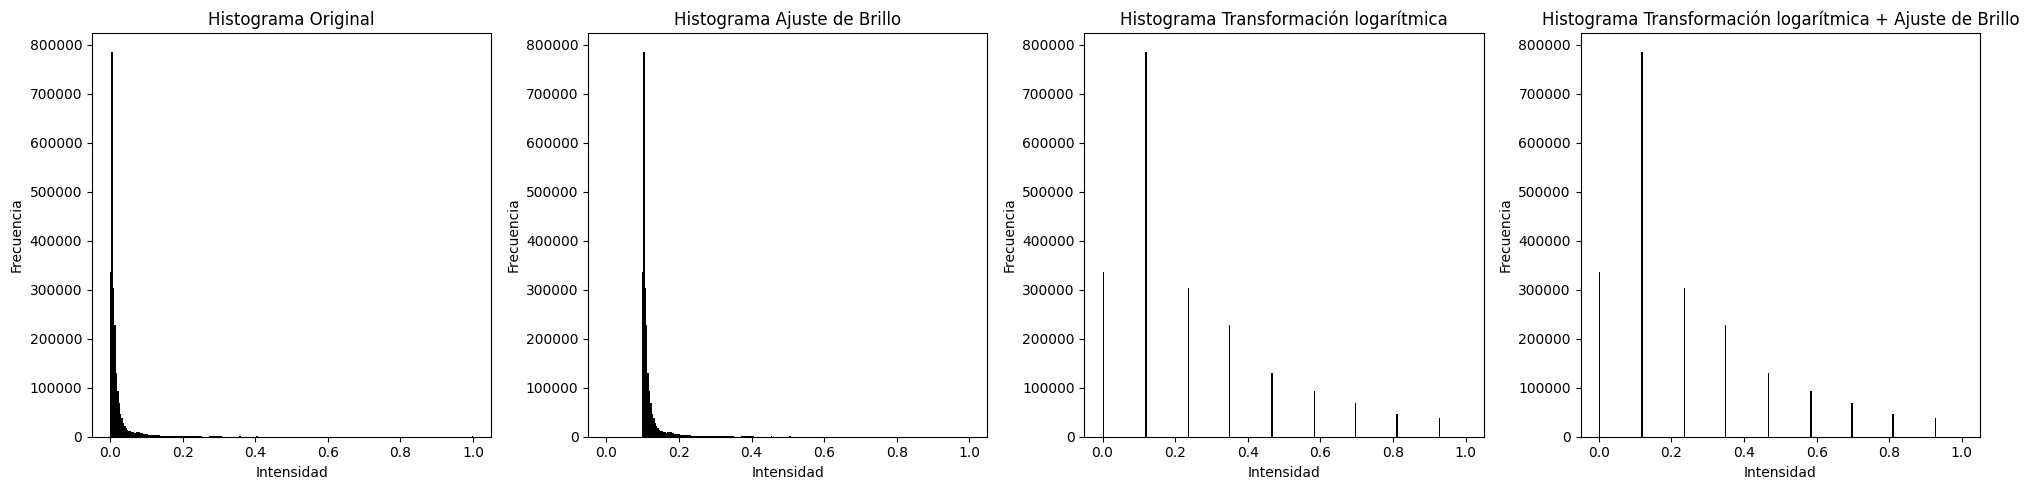

In [2]:
# Cargar una imagen de ejemplo
image_path = "images/dark_1.png"
image = img_as_float(imread(image_path))

# 1. Ajuste de brillo
def adjust_brightness(image, factor=0.1):
    return np.clip(image + factor, 0, 2)

# 2. Transformación logarítmica
def logarithmic_transform(image, c=30):
    return c * np.log1p(image)

brightened_image = adjust_brightness(image)
logarithmic_image = logarithmic_transform(image)

# Combinacion de transformadas
combined_image = adjust_brightness(logarithmic_image)


# Mostrar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(brightened_image, cmap='gray')
ax[1].set_title("Ajuste de Brillo")
ax[2].imshow(logarithmic_image, cmap='gray')
ax[2].set_title("Transformación logarítmica")
ax[3].imshow(combined_image, cmap='gray')
ax[3].set_title("Transformación logarítmica + Ajuste de Brillo")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Mostrar histogramas
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].hist(image.ravel(), bins=256, range=(0, 1), color='black')
ax[0].set_title("Histograma Original")
ax[1].hist(brightened_image.ravel(), bins=256, range=(0, 1), color='black')
ax[1].set_title("Histograma Ajuste de Brillo")
ax[2].hist(logarithmic_image.ravel(), bins=256, range=(0, 1), color='black')
ax[2].set_title("Histograma Transformación logarítmica")
ax[3].hist(logarithmic_image.ravel(), bins=256, range=(0, 1), color='black')
ax[3].set_title("Histograma Transformación logarítmica + Ajuste de Brillo")


for a in ax:
    a.set_xlabel("Intensidad")
    a.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### **Imagen: dark_2.png**

1. **Ecualización de histograma**
2. **Normalización lineal**

c:\Users\CRODRIGUEZ\Documents\PERSONAL\4-MAESTRIA\2. Cursos\3. Visión Artificial\3. Actividades\Actividad 1\Solucion\.env\Lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..20.0].


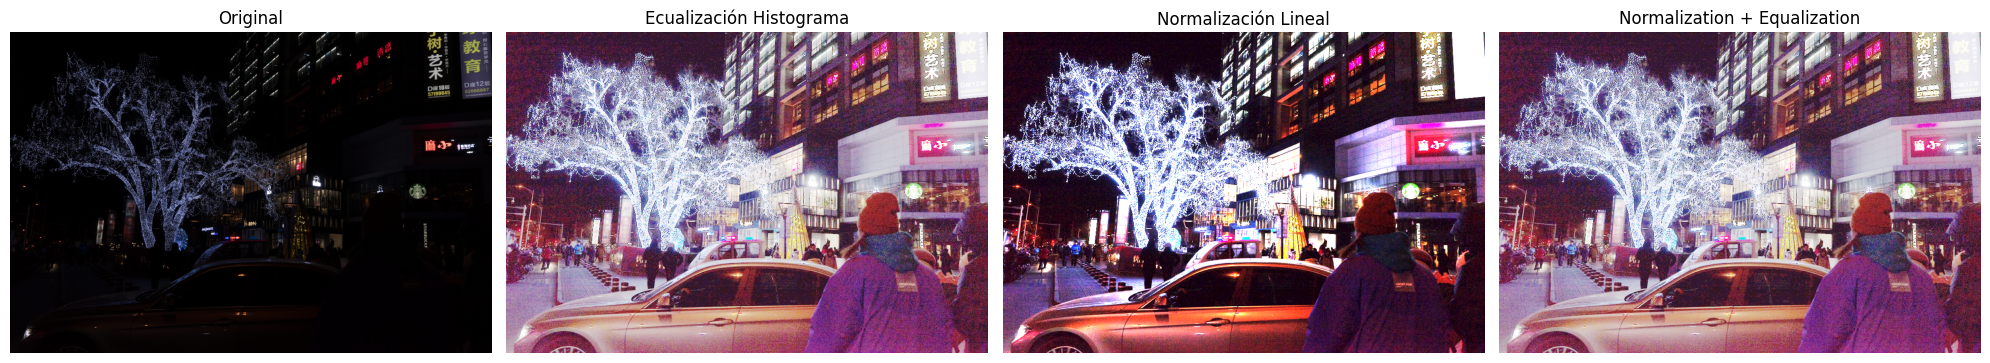

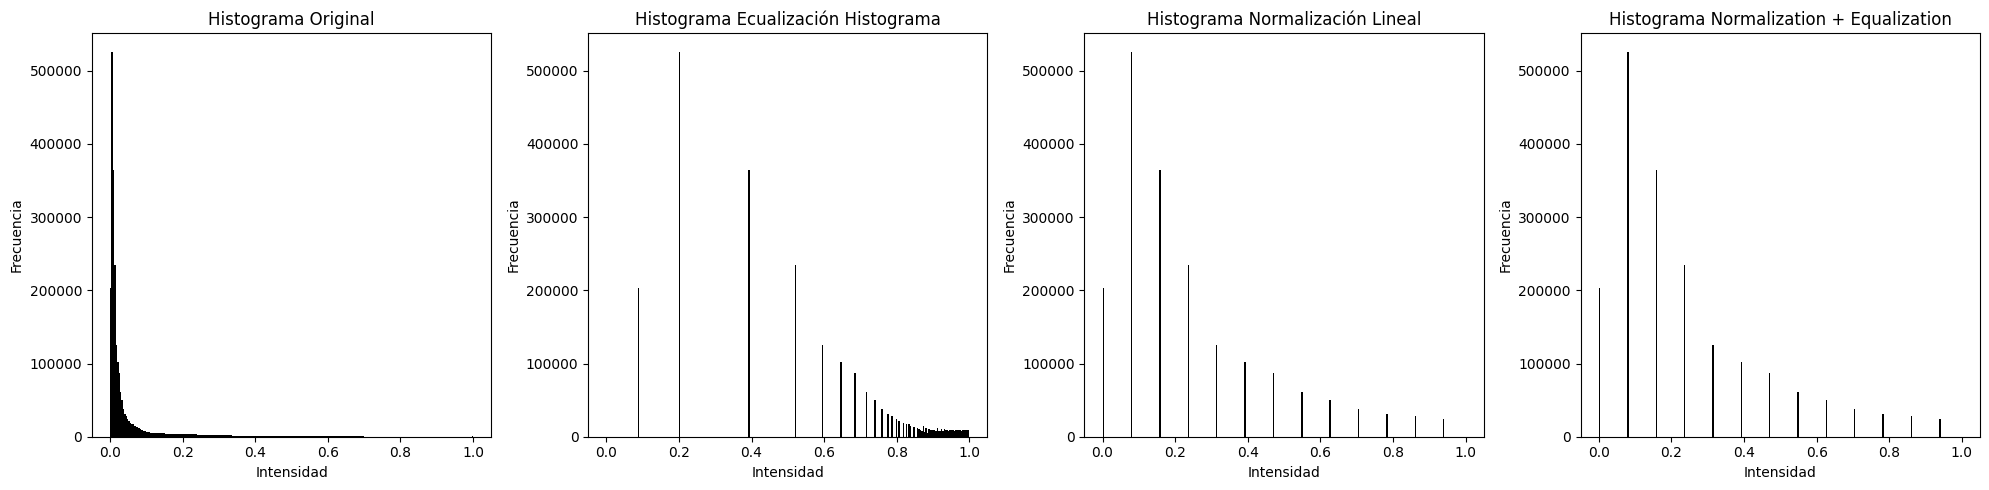

In [3]:
# Cargar una imagen de ejemplo
image_path = "images/dark_2.png"
image = img_as_float(imread(image_path))

# 1. Ecualización de histograma
def histogram_equalization(image):
    return equalize_hist(image)

# 2. Normalización lineal
def normalize_intensity(image, range_end=20):
    return rescale_intensity(image, in_range=(np.min(image), np.max(image)), out_range=(0, range_end))

equalized_image = histogram_equalization(image)
normalized_image = normalize_intensity(image)

# Combinacion de transformadas
combined_image = histogram_equalization(normalized_image)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title("Ecualización Histograma")
ax[2].imshow(normalized_image, cmap='gray')
ax[2].set_title("Normalización Lineal")
ax[3].imshow(combined_image, cmap='gray')
ax[3].set_title("Normalization + Equalization")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Mostrar histogramas
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].hist(image.ravel(), bins=256, range=(0, 1), color='black')
ax[0].set_title("Histograma Original")
ax[1].hist(equalized_image.ravel(), bins=256, range=(0, 1), color='black')
ax[1].set_title("Histograma Ecualización Histograma")
ax[2].hist(normalized_image.ravel(), bins=256, range=(0, 1), color='black')
ax[2].set_title("Histograma Normalización Lineal")
ax[3].hist(normalized_image.ravel(), bins=256, range=(0, 1), color='black')
ax[3].set_title("Histograma Normalization + Equalization")

for a in ax:
    a.set_xlabel("Intensidad")
    a.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### **Imagen: dark_3.png**

1. **Realce de Intensidades Bajos**
2. **Expansión de Contraste Local**

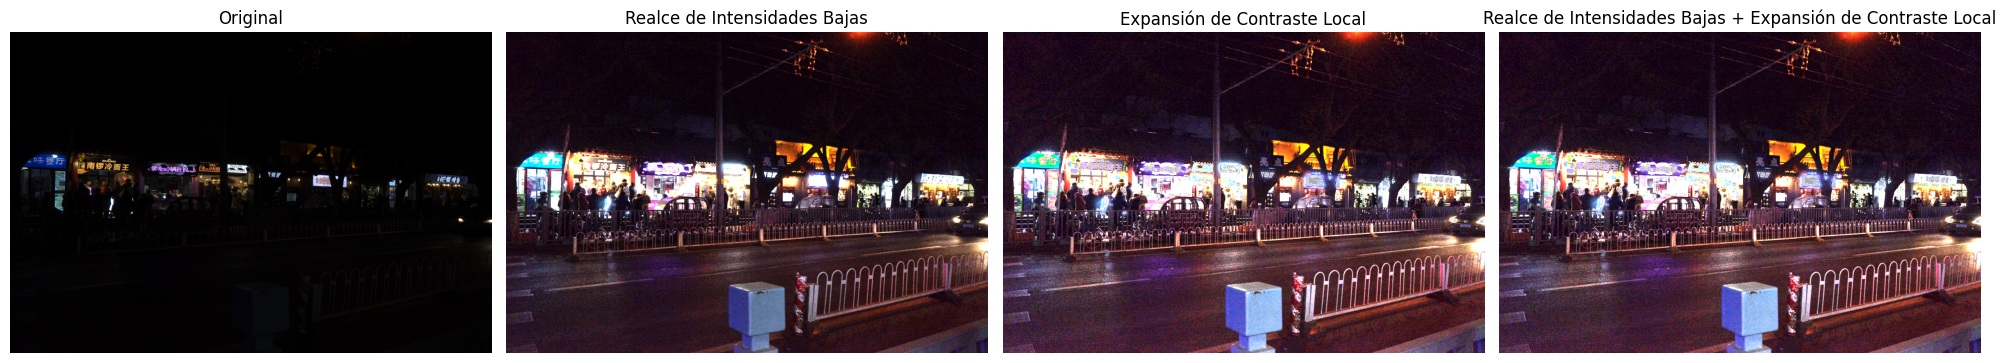

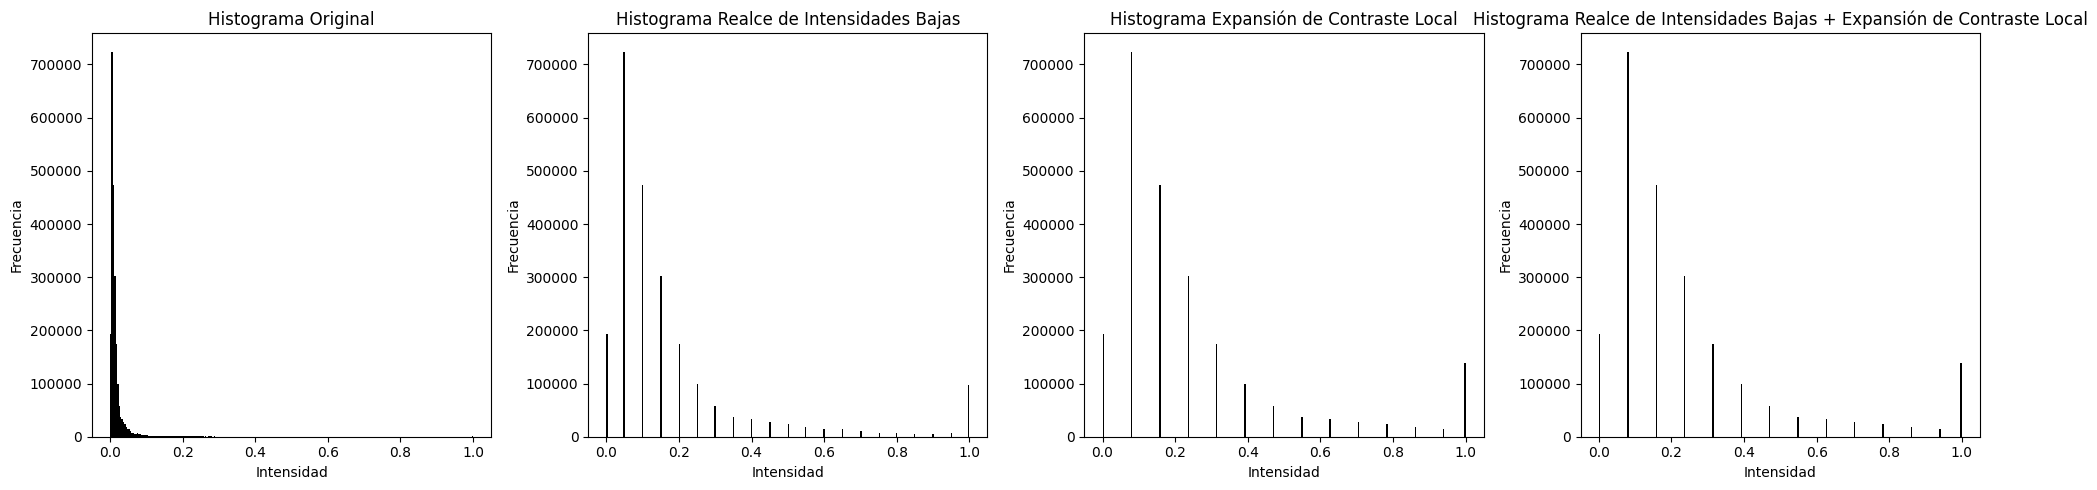

In [4]:
# Cargar una imagen de ejemplo
image_path = "images/dark_3.png"
image = img_as_float(imread(image_path))

# 1. Realce de Intensidades Bajas
def enhance_low_intensity(image, factor=2.0, threshold=0.3):
    enhanced_image = np.copy(image)
    mask = image < threshold
    enhanced_image[mask] *= factor
    return np.clip(enhanced_image, 0, 1)

# 2. Expansión de Contraste Local
def expand_contrast(image, lower_percentile=4, upper_percentile=96):
    lower, upper = np.percentile(image, (lower_percentile, upper_percentile))
    return np.clip((image - lower) / (upper - lower), 0, 1)

expanded_contrast_image = expand_contrast(image)
enhanced_low_image = enhance_low_intensity(image, factor=20.0, threshold=0.5)

# Combinacion de transformadas
combined_image = expand_contrast(enhanced_low_image)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(expanded_contrast_image, cmap='gray')
ax[1].set_title("Realce de Intensidades Bajas")
ax[2].imshow(enhanced_low_image, cmap='gray')
ax[2].set_title("Expansión de Contraste Local")
ax[3].imshow(combined_image, cmap='gray')
ax[3].set_title("Realce de Intensidades Bajas + Expansión de Contraste Local")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Mostrar histogramas
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].hist(image.ravel(), bins=256, range=(0, 1), color='black')
ax[0].set_title("Histograma Original")
ax[1].hist(expanded_contrast_image.ravel(), bins=256, range=(0, 1), color='black')
ax[1].set_title("Histograma Realce de Intensidades Bajas")
ax[2].hist(enhanced_low_image.ravel(), bins=256, range=(0, 1), color='black')
ax[2].set_title("Histograma Expansión de Contraste Local")
ax[3].hist(combined_image.ravel(), bins=256, range=(0, 1), color='black')
ax[3].set_title("Histograma Realce de Intensidades Bajas + Expansión de Contraste Local")

for a in ax:
    a.set_xlabel("Intensidad")
    a.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### **Imagen: dark_4.png**

1. **Transformación logarítmica**
2. **Normalización lineal**
3. **Expansión de Contraste Local**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..27.725887222397812].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..40.0].


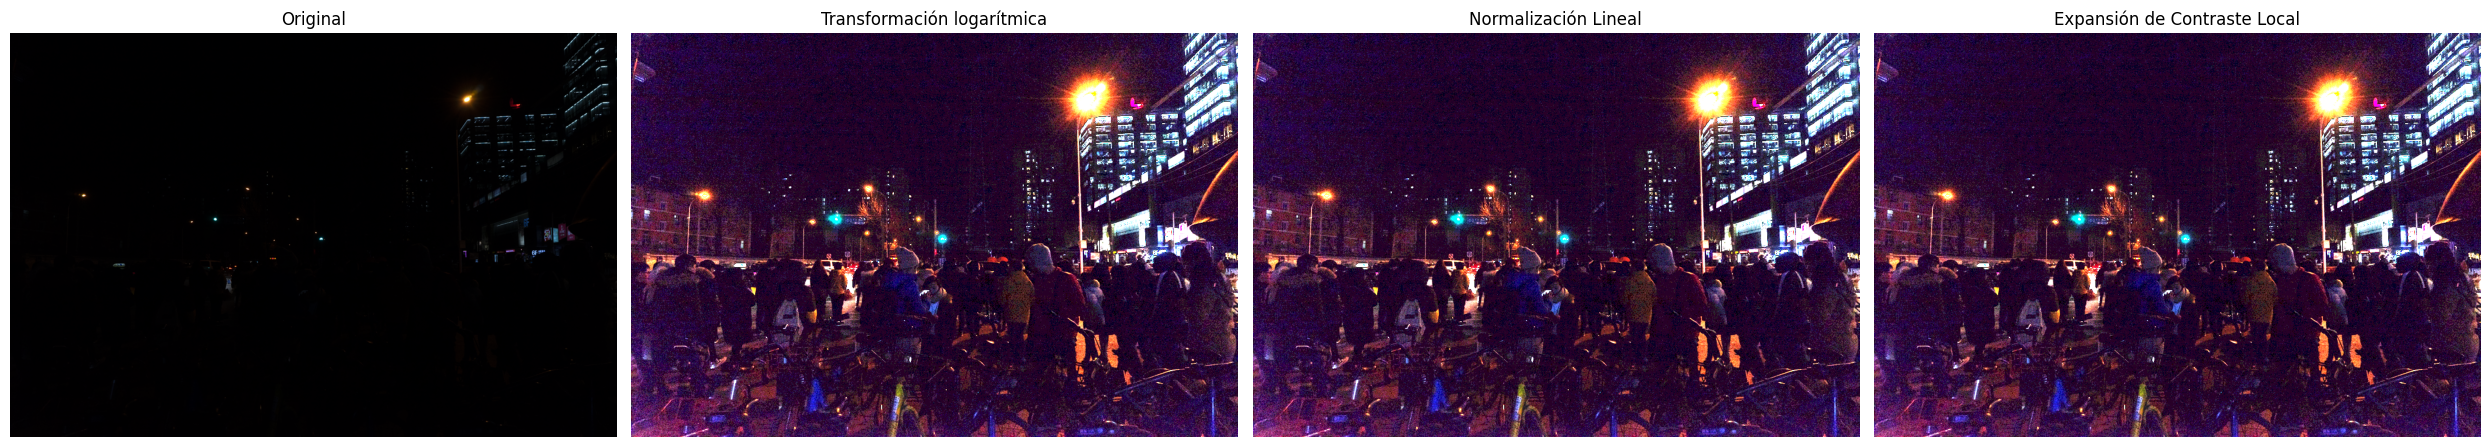

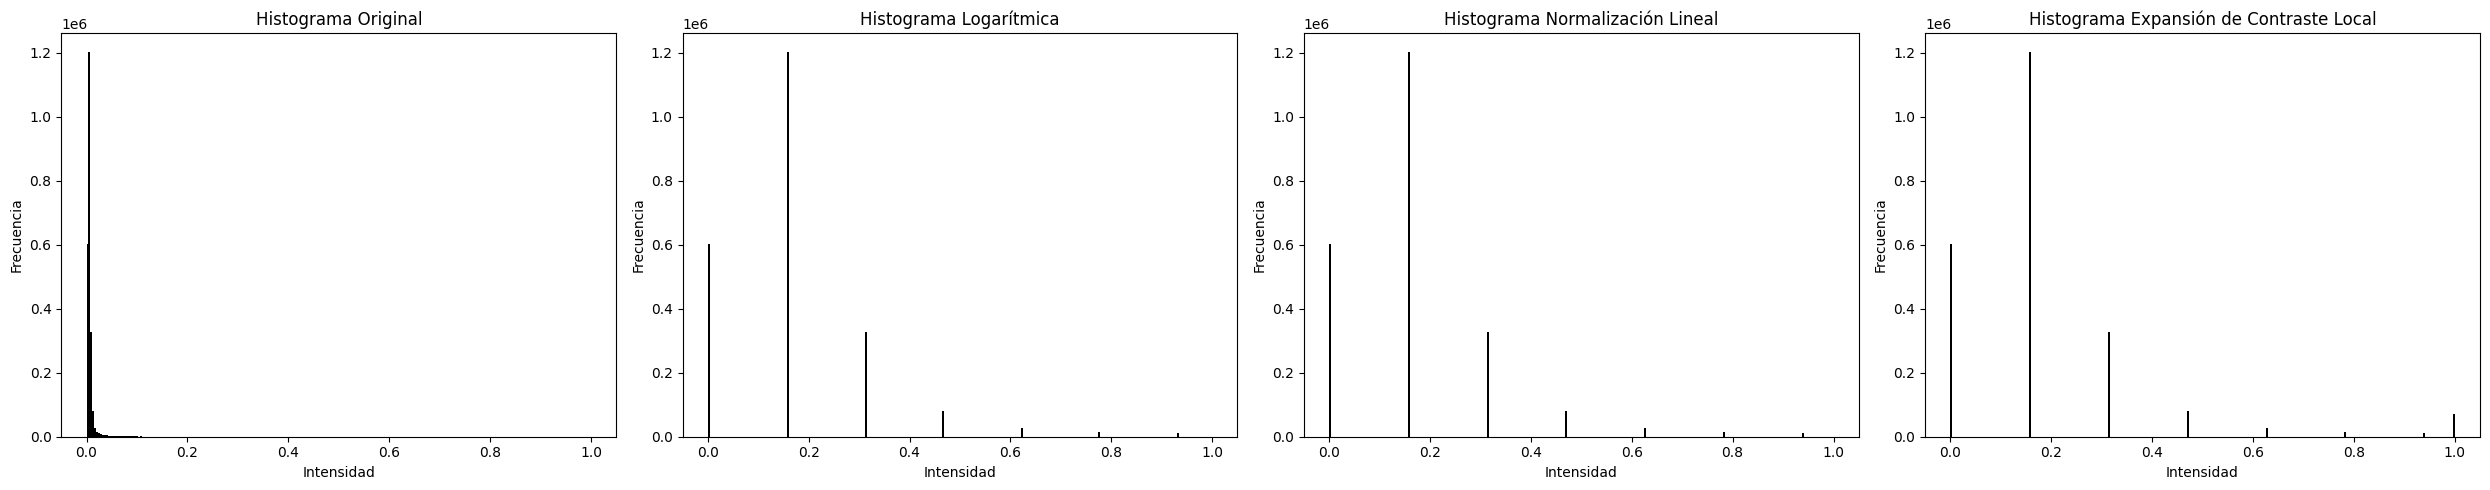

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..111.40716200112924].


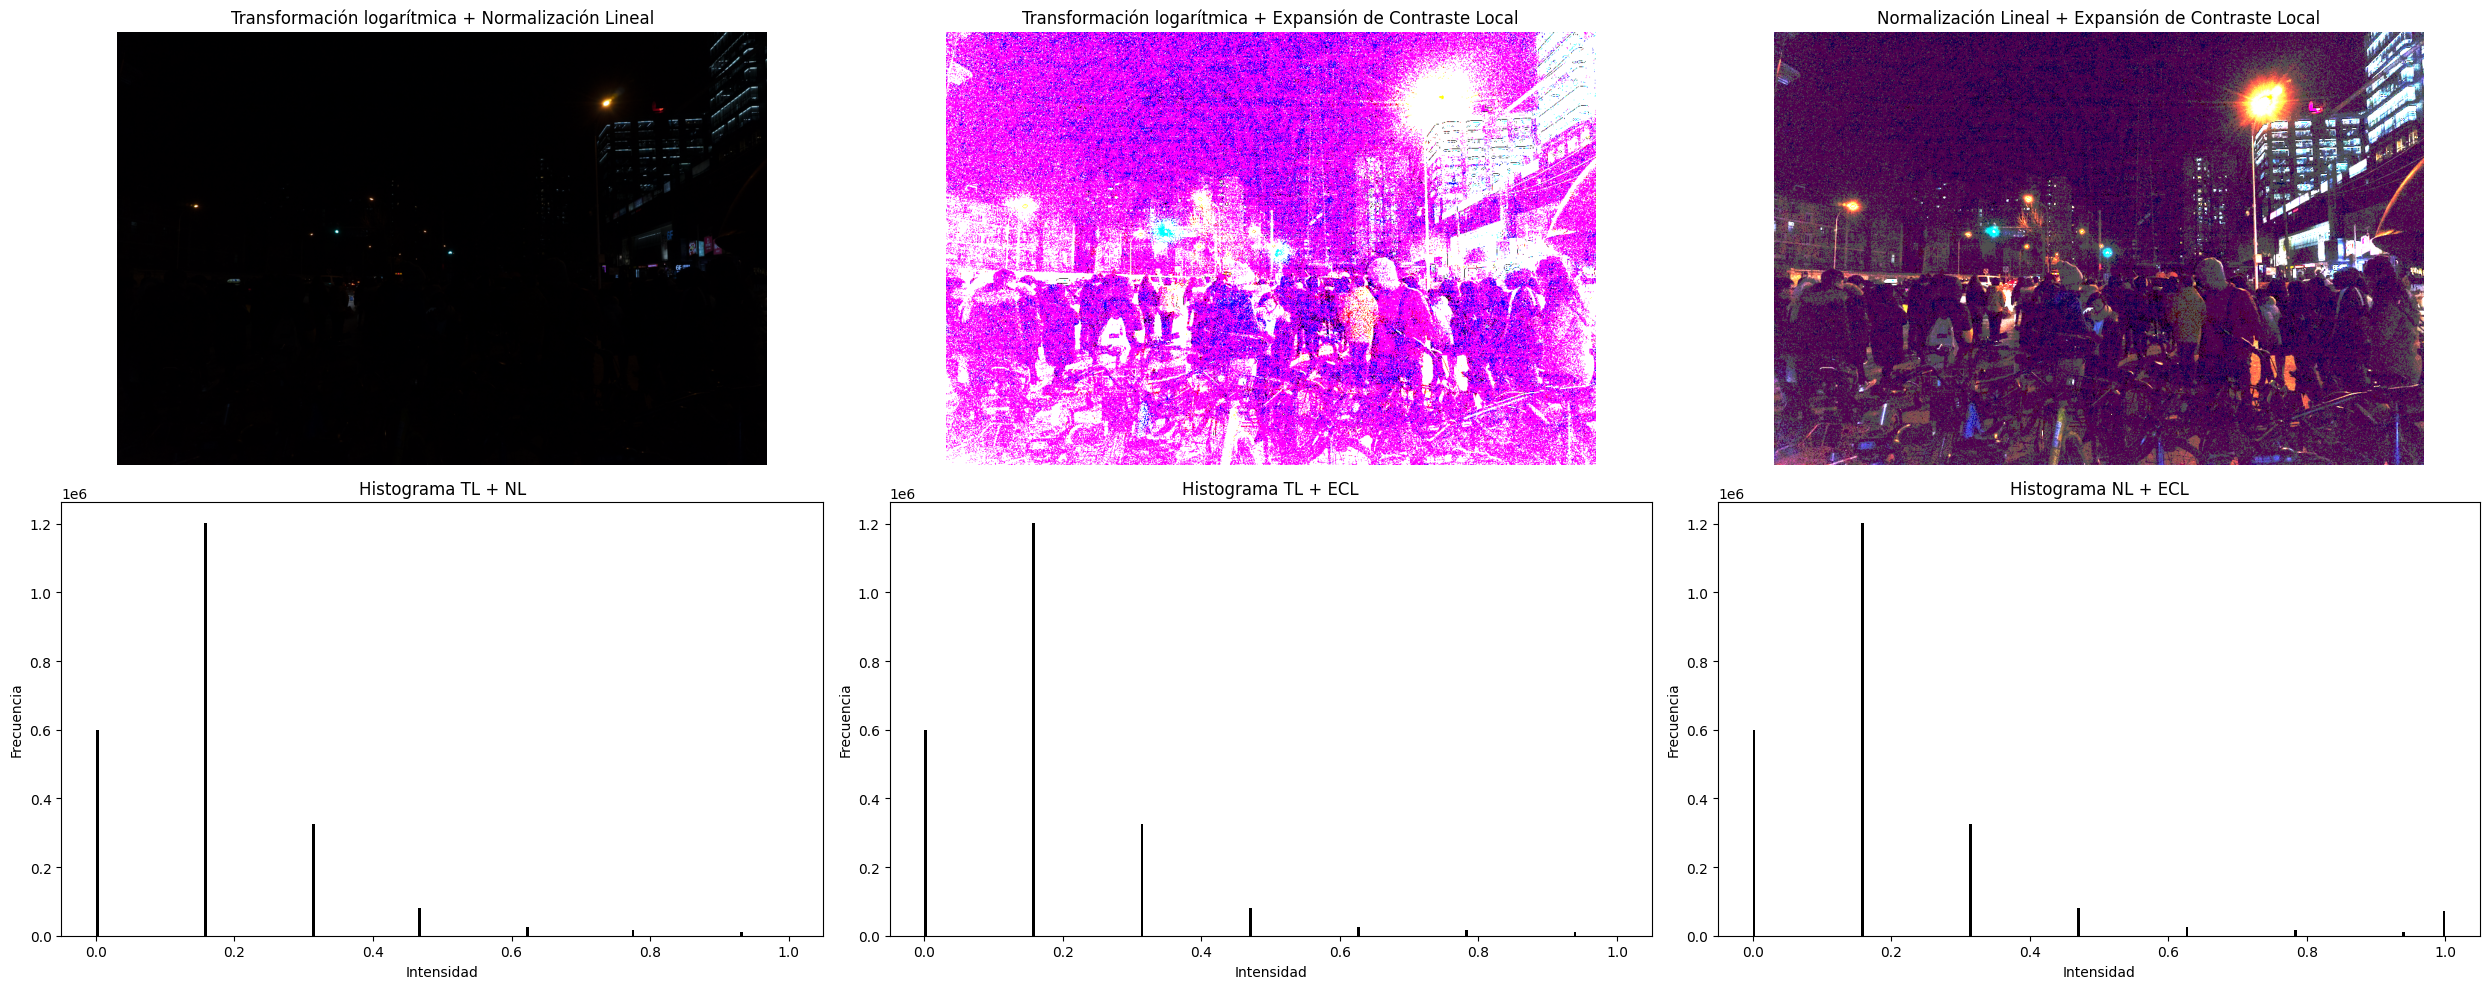

In [5]:
# Cargar una imagen de ejemplo
image_path = "images/dark_4.png"
image = img_as_float(imread(image_path))

logarithmic_image = logarithmic_transform(image, c=40)
normalized_image = normalize_intensity(image, range_end=40)
enhanced_low_image = enhance_low_intensity(image, factor=40.0, threshold=1.0)

# Combinaciones de transformadas
combined_image_1 = logarithmic_transform(normalized_image)
combined_image_2 = logarithmic_transform(enhanced_low_image)
combined_image_3 = enhance_low_intensity(normalized_image)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(logarithmic_image, cmap='gray')
ax[1].set_title("Transformación logarítmica")
ax[2].imshow(normalized_image, cmap='gray')
ax[2].set_title("Normalización Lineal")
ax[3].imshow(enhanced_low_image, cmap='gray')
ax[3].set_title("Expansión de Contraste Local")

for a in ax:
    a.axis("off")

plt.tight_layout()
plt.show()

# Mostrar histogramas
fig, ax = plt.subplots(1, 4, figsize=(25, 5))
ax[0].hist(image.ravel(), bins=256, range=(0, 1), color='black')
ax[0].set_title("Histograma Original")
ax[1].hist(logarithmic_image.ravel(), bins=256, range=(0, 1), color='black')
ax[1].set_title("Histograma Logarítmica")
ax[2].hist(normalized_image.ravel(), bins=256, range=(0, 1), color='black')
ax[2].set_title("Histograma Normalización Lineal")
ax[3].hist(enhanced_low_image.ravel(), bins=256, range=(0, 1), color='black')
ax[3].set_title("Histograma Expansión de Contraste Local")

for a in ax:
    a.set_xlabel("Intensidad")
    a.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Mostrar las imágenes (Combinadas)
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Transformación logarítmica + Normalización Lineal")
axes[0, 0].axis("off")

axes[0, 1].imshow(combined_image_1, cmap='gray')
axes[0, 1].set_title("Transformación logarítmica + Expansión de Contraste Local")
axes[0, 1].axis("off")

axes[0, 2].imshow(combined_image_3, cmap='gray')
axes[0, 2].set_title("Normalización Lineal + Expansión de Contraste Local")
axes[0, 2].axis("off")

# Mostrar histogramas (Combinadas)
axes[1, 0].hist(logarithmic_image.ravel(), bins=256, range=(0, 1), color='black')
axes[1, 0].set_title("Histograma TL + NL")
axes[1, 0].set_xlabel("Intensidad")
axes[1, 0].set_ylabel("Frecuencia")

axes[1, 1].hist(normalized_image.ravel(), bins=256, range=(0, 1), color='black')
axes[1, 1].set_title("Histograma TL + ECL")
axes[1, 1].set_xlabel("Intensidad")
axes[1, 1].set_ylabel("Frecuencia")

axes[1, 2].hist(enhanced_low_image.ravel(), bins=256, range=(0, 1), color='black')
axes[1, 2].set_title("Histograma NL + ECL")
axes[1, 2].set_xlabel("Intensidad")
axes[1, 2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()